# 🎯 Goal
The goal of this project is to apply and compare multiple machine learning classification algorithms on the Titanic dataset to predict passenger survival. By preprocessing the data and training models like SVM, KNN, Naive Bayes, Decision Tree, Gradient Boosting, AdaBoost, and LightGBM, we aim to evaluate their performance and determine the most effective algorithm for accurate prediction.
Additionally, visualization techniques such as graphs, bar plots, and correlation heatmaps were used to observe relationships between features and gain insights into the data before modeling.

# 🔹Step 1:
Importing necessary liabraries 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

# 🔹 Step 2: Load Dataset
We load the Titanic dataset from a public GitHub URL. This dataset contains passenger information used to predict survival.

In [53]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
print("dataset shape ",df.shape)

dataset shape  (891, 12)


# 🔹 Step 3: Handle Missing Values
Age is filled with its median.

Embarked is filled with its mode.

Cabin is dropped because it has too many missing values.

Unnecessary columns like Name, Ticket, and PassengerId are also dropped

In [19]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [63]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [64]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [65]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# 🔹 Step 4: Encode Categorical Variables
We convert Sex and Embarked columns into numeric form using LabelEncoder so that machine learning models can use them.

In [66]:
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])       
df['Embarked'] = label_enc.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# 🔹 Step 5: Define Features and Target
Features (X): All columns except Survived

Target (y): Survived (0 = No, 1 = Yes)

In [67]:
X = df.drop('Survived', axis=1)
y = df['Survived']
df_cleaned = df.dropna(subset=['Age', 'Fare', 'Pclass', 'Survived', 'Sex', 'Embarked'])

# Correlation heatmap

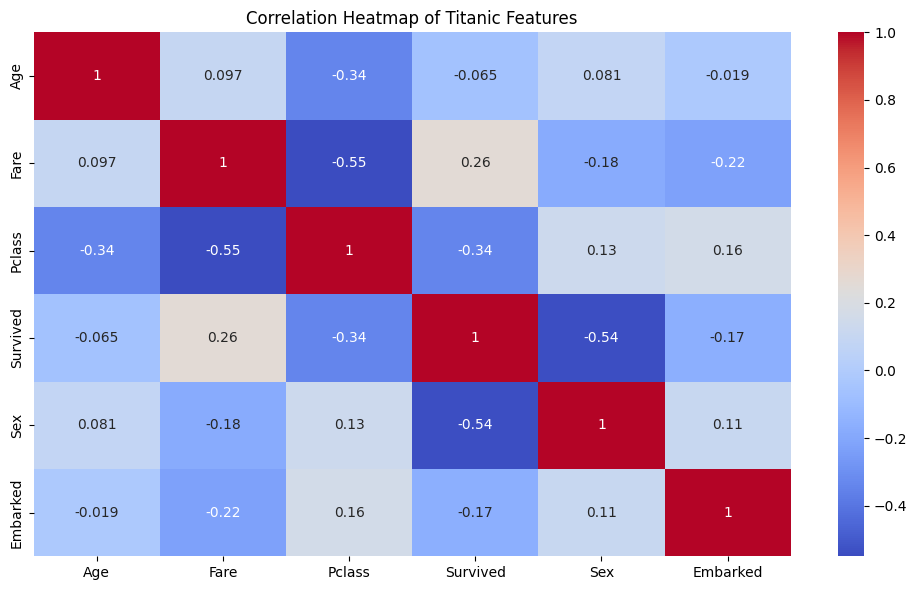

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[['Age', 'Fare', 'Pclass', 'Survived', 'Sex', 'Embarked']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Titanic Features')
plt.tight_layout()
plt.show()

# Bar plot: Survival by Sex

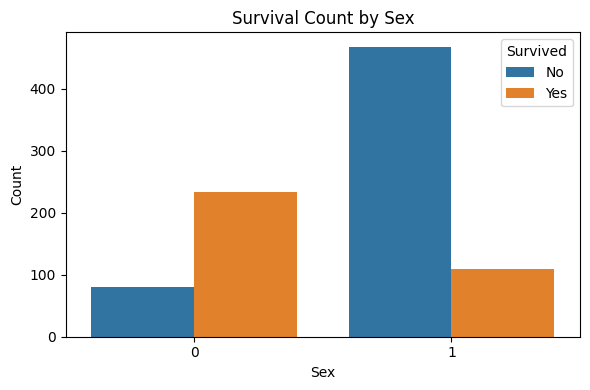

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df_cleaned)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Bar plot: Survival by Class

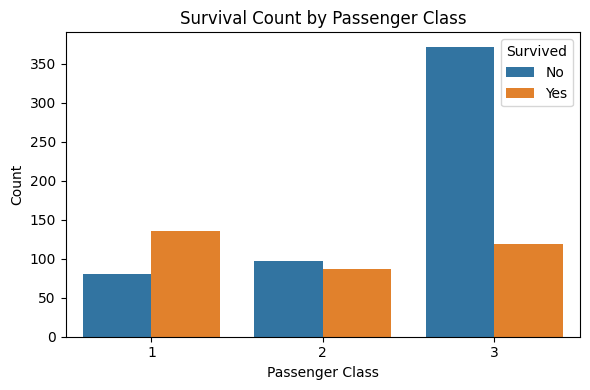

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df_cleaned)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Bar plot: Survival by Embarked

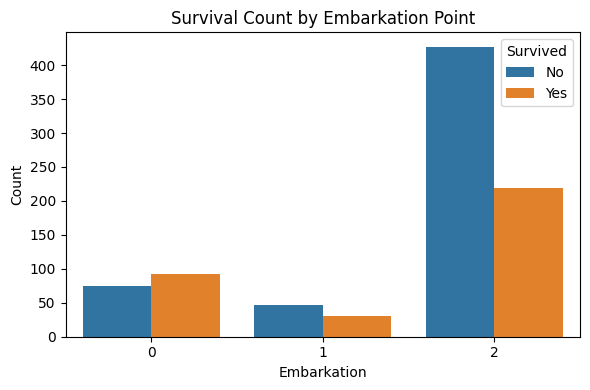

In [75]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df_cleaned)
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# 🔹 Step 6: Train/Test Split
Split the dataset into training (80%) and testing (20%) sets.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
Working: Builds a tree where each node represents a decision based on a feature value. It splits data recursively to classify outcomes.

Use Case: Easy to interpret and visualize.

In [30]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



# Confusion Matrix

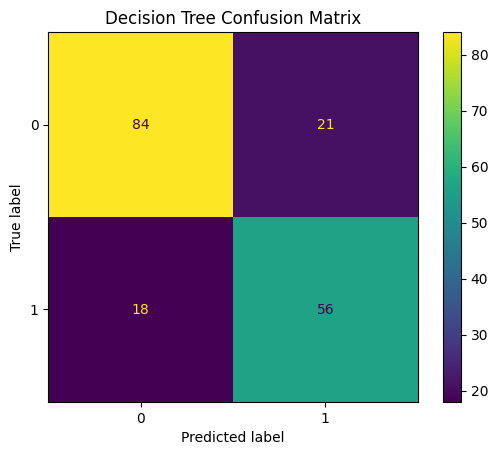

In [29]:
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Support Vector Machine (SVM)
SVM finds the optimal hyperplane that best separates the data into classes. It’s very effective in high-dimensional spaces and when classes are clearly separated. However, it can be slow with large datasets and sensitive to scaling.

In [32]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



# Confusion Matrix

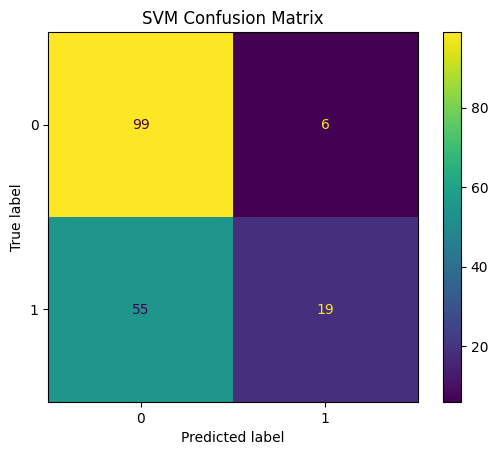

In [33]:
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

# K-Nearest Neighbors (KNN)
KNN is a lazy learner that classifies data based on the most common label among its K closest neighbors. It's simple and effective for smaller datasets but can be computationally expensive on large datasets.

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("KNN:\n", classification_report(y_test, y_pred_knn))

KNN:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.54      0.62        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.70       179
weighted avg       0.72      0.72      0.71       179



# Confusion Matrix

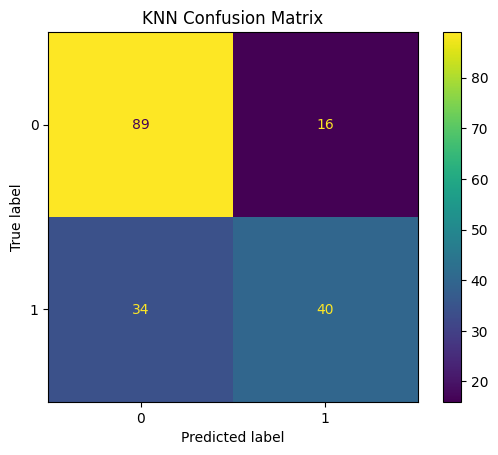

In [36]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()

# Naive Bayes
Naive Bayes is a probabilistic model based on Bayes' Theorem, assuming feature independence. It’s fast, simple, and works surprisingly well with text and categorical data, but the independence assumption may not always hold.



In [38]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



# Confusion Matrix

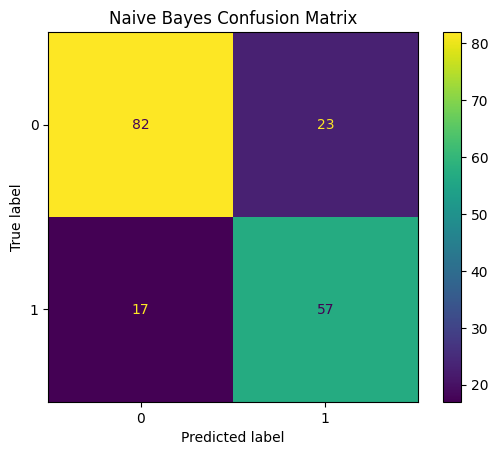

In [39]:
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Gradient Boosting
Gradient Boosting builds models in a stage-wise fashion, where each new model corrects the errors of the previous ones. It's a powerful technique that often yields high performance but can be slow to train.

In [41]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# Confusion Matrix

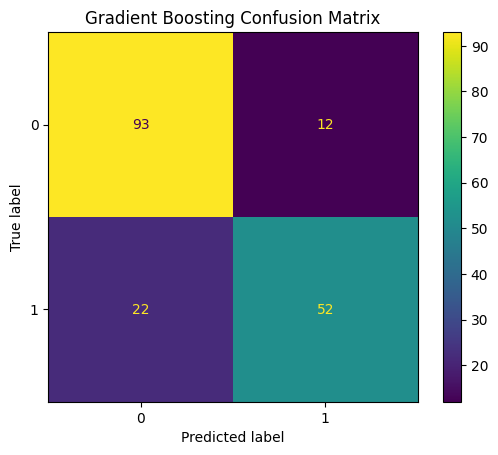

In [42]:
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# AdaBoost
AdaBoost combines multiple weak classifiers (like shallow decision trees) to form a strong classifier. It adjusts the weights of incorrectly classified instances to focus more on hard cases in the next iteration.

In [44]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train, y_train)
y_pred_ab = model_ab.predict(X_test)

print("AdaBoost:\n", classification_report(y_test, y_pred_ab))

AdaBoost:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



# Confusion Matrix

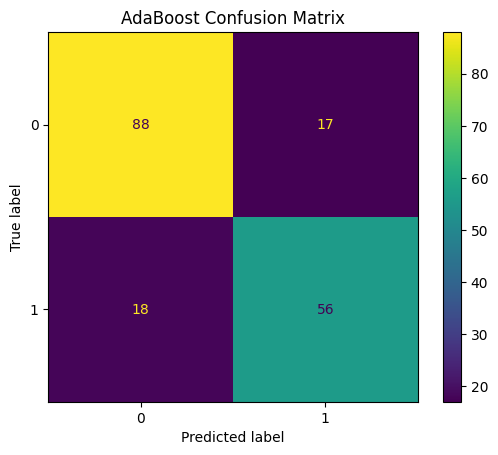

In [45]:
cm = confusion_matrix(y_test, y_pred_ab)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("AdaBoost Confusion Matrix")
plt.show()

# LightGBM
LightGBM is a fast and scalable gradient boosting framework developed by Microsoft. It uses histogram-based learning and is highly efficient for large datasets. It often outperforms other models in both speed and accuracy.

In [48]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)
y_pred_lgbm = model_lgbm.predict(X_test)

print("LightGBM:\n", classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# Confusion Matrix

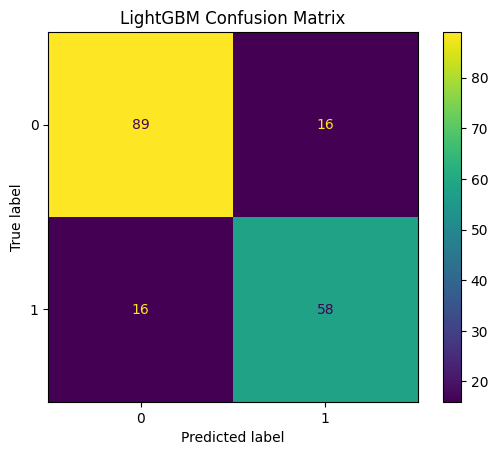

In [49]:
cm = confusion_matrix(y_test, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("LightGBM Confusion Matrix")
plt.show()

# Conclusion
After evaluating multiple machine learning models on the Titanic dataset, the following insights were observed:

 ***LightGBM***  achieved the highest performance with an accuracy of 82% and strong precision and recall values. It is the most reliable model among all tested.

***Gradient Boosting and AdaBoost*** also performed very well, with accuracies of 81% and 80% respectively, making them strong candidates for deployment.

***Naive Bayes*** showed decent performance (accuracy of 78%), proving to be a simple yet effective classifier.

***Decision Tree*** performed moderately with 77% accuracy, offering interpretability but slightly lower generalization.

***K-Nearest Neighbors (KNN)*** reached 72% accuracy, but showed weakness in recall, especially for the minority class.

***Support Vector Machine (SVM)*** gave the poorest results (66% accuracy), mainly due to its very low recall (26%) for the positive class, making it unsuitable in this case.

# ***✅ Final Verdict:***
Models like ***LightGBM, Gradient Boosting***, and ***AdaBoost*** are recommended due to their high accuracy and balanced performance metrics. Simpler models like **Naive Bayes** can also be considered for faster computation and basic deployments.